In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import datetime as dt

In [ ]:
data = pd.read_csv('/content/Amazon Sale Report.csv')

Amazon Sales Report
Overview:
This dataset provides detailed sales data from Amazon, offering a comprehensive look at various product categories and their performance over time. It includes information on sales figures, order details, product categories, and customer demographics.

Features:
1. Order ID
Description: A unique identifier for each order placed on Amazon. This field helps to track individual orders and link related records.

2. Dates
Description: The date when the order was placed. This field is crucial for analyzing sales trends over time and identifying seasonal patterns.

3. Status
Description: The current status of the order (e.g., Shipped, Delivered, Pending). This field provides insight into the order fulfillment process and helps monitor order processing efficiency.

4. Fulfillment
Description: Indicates the method used to fulfill the order (e.g., Fulfilled by Amazon, Fulfilled by Seller). This feature helps in analyzing the performance of different fulfillment methods and their impact on customer satisfaction.

5. Sales Channel
Description: The channel through which the sale was made (e.g., Amazon Website, Mobile App). This field is useful for evaluating the effectiveness of different sales channels and understanding customer preferences.

6. Category
Description: The product category to which the purchased item belongs (e.g., Electronics, Clothing, Home Goods). This feature aids in analyzing sales performance across various product categories.

7. Ship Service Level
Description: The shipping service level selected for the order (e.g., Standard Shipping, Two-Day Shipping). This field helps to assess the impact of shipping options on delivery times and customer satisfaction.

8. Size
Description: The size of the product ordered (e.g., Small, Medium, Large). This feature is relevant for analyzing sales performance based on product size and understanding inventory requirements.

9. Carrier Status
Description: The status of the shipment with the carrier (e.g., In Transit, Delivered, Returned). This field provides insights into the shipping process and helps in monitoring delivery performance and handling returns.

Use Cases:
Sales Analysis:
Examine trends in sales over time, identify peak periods, and analyze performance by product category.

Customer Insights:
Explore customer demographics to understand purchasing behavior and preferences.

Inventory Management:
Assess which products are performing well and which are not, aiding in inventory and supply chain management.

Marketing Strategies:
Develop targeted marketing campaigns based on sales trends and customer profiles.

Data Source:
This dataset is a simulated collection of Amazon sales data and is intended for educational and analytical purposes.

Acknowledgments:
This dataset was created to facilitate data analysis and machine learning projects. It is ideal for practicing data manipulation, statistical analysis, and predictive modeling.

In [ ]:
pd.set_option('display.max_columns',50)

In [ ]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
# Statistical summary of categorical columns
categorical_summary = data.describe(include='object')
print("Categorical Summary:\n", categorical_summary)

Categorical Summary:
                    Order ID        Date   Status Fulfilment Sales Channel  \
count                128976      128976   128976     128976        128976   
unique               120229          91       13          2             2   
top     403-4984515-8861958  05-03-2022  Shipped     Amazon     Amazon.in   
freq                     12        2085    77815      89713        128852   

       ship-service-level Category    Size Courier Status currency  ship-city  \
count              128976   128976  128976         128976   121176     128941   
unique                  2        9      11              4        1       8948   
top             Expedited  T-shirt       M        Shipped      INR  BENGALURU   
freq                88630    50292   22373         109486   121176      11208   

         ship-state ship-country fulfilled-by  
count        128941       128941        39263  
unique           69            1            1  
top     MAHARASHTRA           IN    Easy S

In [ ]:
# Statistical summary of numerical columns
data.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


**Key Observations:**

- High variation in Amount values as shown by the large standard deviation.
- Qty has a mean near 1, indicating that many orders involve a single unit.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

**Observations:**
- Columns fulfilled-by, New, and Pending$ have many missing values. Hence, they were dropped.
- currency and Amount columns have fewer missing values, which can be imputed.

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


In [ ]:
# Check for duplicate Order IDs
duplicates = data.duplicated(subset='Order ID').sum()
print("Number of duplicate Order IDs:", duplicates)

Number of duplicate Order IDs: 8747


In [ ]:
# data['Order ID'].duplicated().sum()

In [ ]:
# make a copy of data into df
df=data.copy()

In [ ]:
# drop duplicate orders from data
df.drop_duplicates(subset='Order ID',inplace=True,keep="last")

**Interpretation:**

- 8747 duplicate Order IDs were found and removed.

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7381
Amount                  7381
ship-city                 28
ship-state                28
ship-postal-code          28
ship-country              28
B2B                        0
fulfilled-by           83906
New                   120229
PendingS              120229
dtype: int64


## the columns 'fulfilled-by', 'New' and  'PendingS' has large number of missing values so remove these columns.

In [ ]:
df.drop(columns=['fulfilled-by', 'New', 'PendingS'],inplace=True)

## the currency column have only one value which is "INR" so fill missing values by INR

In [ ]:
df["currency"].fillna(df["currency"].mode()[0],inplace=True)

<ipython-input-287-8390e8870ed2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["currency"].fillna(df["currency"].mode()[0],inplace=True)


## Fill missing values in amount column by mean value of amount

In [ ]:
df["Amount"].fillna(df["Amount"].mean(),inplace=True)

<ipython-input-288-856786c1ed53>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Amount"].fillna(df["Amount"].mean(),inplace=True)


**Interpretation:**

- Using the mode for categorical data like currency is common, especially when one value is dominant.
- Using the mean for Amount assumes missing entries are average, which is reasonable if the dataset is not highly skewed.

## now there are very less no of rows which have null values (28) so remove this rows colpletely

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(120201, 18)

In [ ]:
# Date time analysis

In [ ]:
# Convert Dates column to datetime format
df['Date'] = pd.to_datetime(data['Date'], errors='coerce')

<ipython-input-292-a9d087315c79>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [ ]:
# Extract month and day of the week
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()
df['week_num'] = df['Date'].dt.isocalendar().week

In [ ]:
# df.head()

In [ ]:
# Plot sales trend over time
monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales

,Amount
Month,
3,1.003138e+05
4,2.871159e+07
5,2.600237e+07
6,2.328751e+07


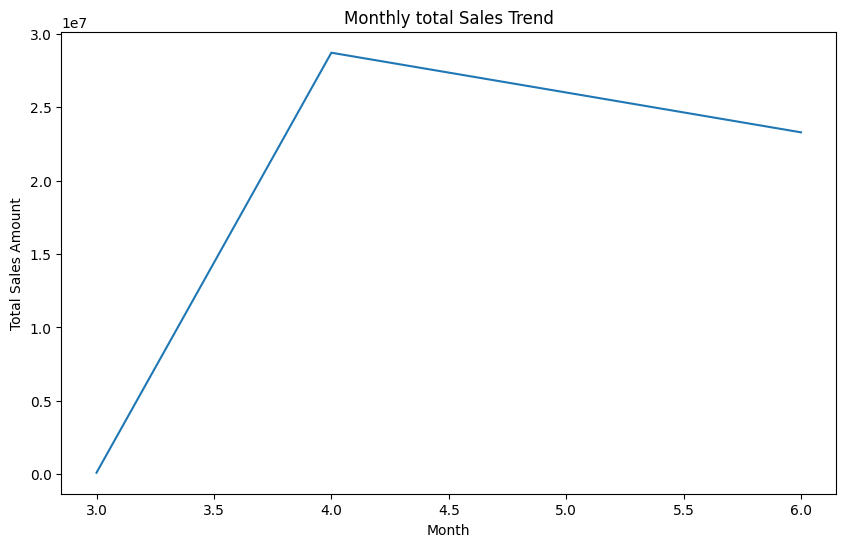

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly total Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()

**Interpretation:**

- The graph indicates a rapid increase in total sales up to the peak month (likely April).
- After reaching the peak, there is a decline in sales in the following month(s).
- This pattern suggests a seasonal or one-time spike in sales, possibly due to a specific event, promotion, or holiday in the peak month.

**Questions to Consider:**

- What caused the peak in sales during that month?
- Could it be a seasonal event, sale, or external factor?

In [ ]:
monthly_sales_avg = df.groupby('Month')['Amount'].mean()
monthly_sales_avg

,Amount
Month,
3,634.897727
4,628.289904
5,663.156654
6,662.800895


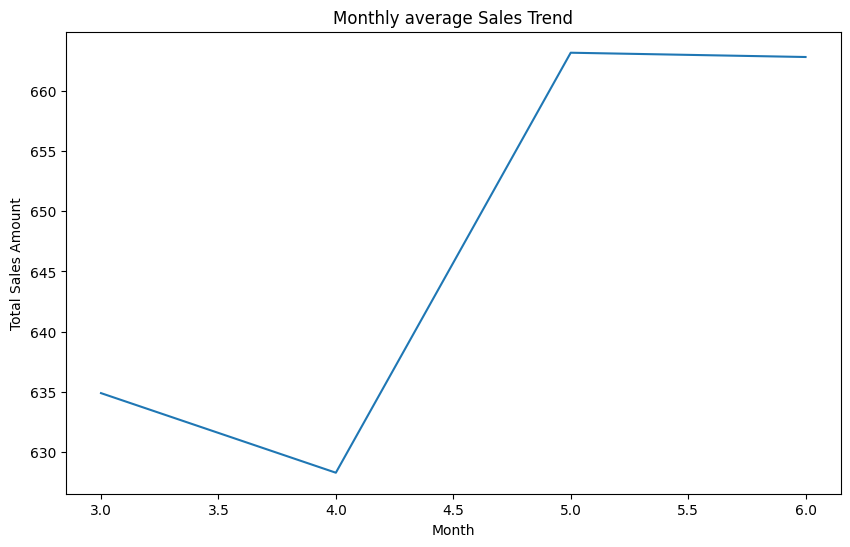

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales_avg.index, y=monthly_sales_avg.values)
plt.title('Monthly average Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()

**Interpretation:**

- The graph shows a decline in the average sales amount initially, followed by a sharp increase, and then another decline.
- This fluctuation could suggest varying order sizes across months, possibly due to different promotions, discounts, or seasonal product popularity.

**Questions to Consider:**

- Why does the average sales amount fluctuate so drastically?
- Are there specific factors (like sales or promotions) influencing the average order size?
- Does this pattern align with specific marketing campaigns, discounts, or new product launches?

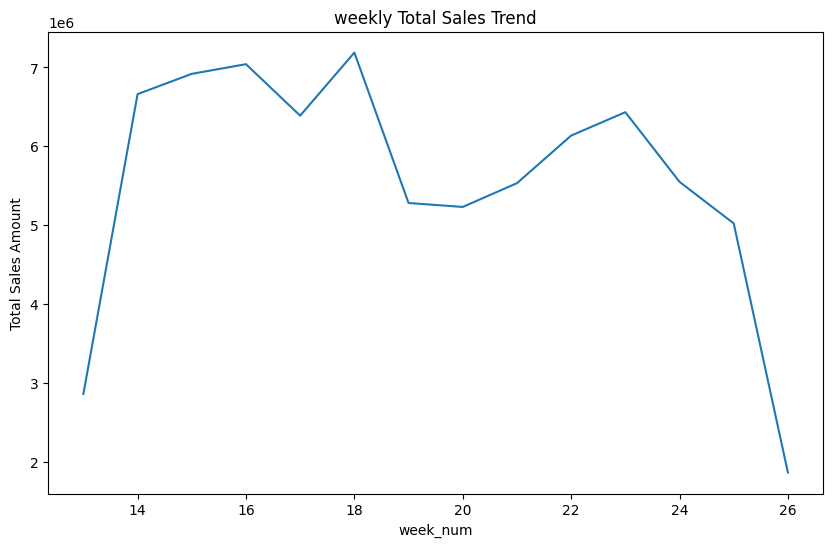

In [ ]:
weekly_total_sales = df.groupby('week_num')['Amount'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=weekly_total_sales.index, y=weekly_total_sales.values)
plt.title('weekly Total Sales Trend')
plt.xlabel('week_num')
plt.ylabel('Total Sales Amount')
plt.show()

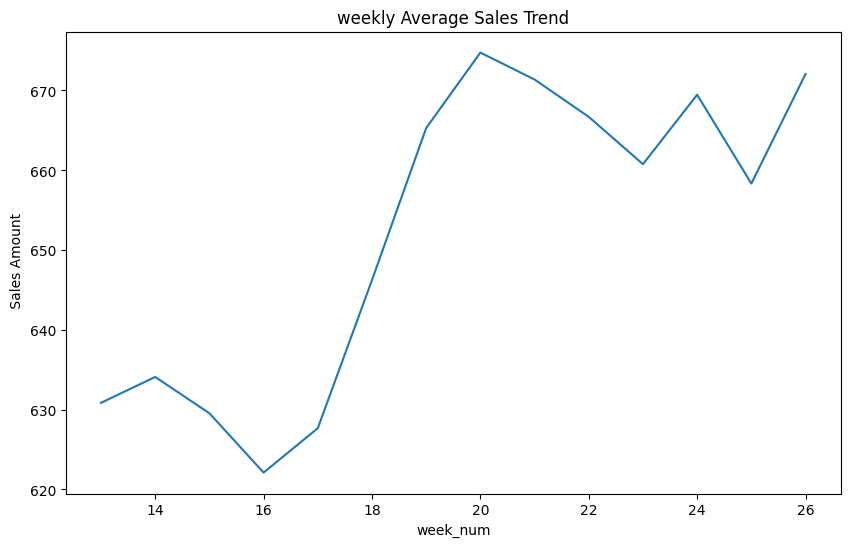

In [ ]:
weekly_average_sales = df.groupby('week_num')['Amount'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=weekly_average_sales.index, y=weekly_average_sales.values)
plt.title('weekly Average Sales Trend')
plt.xlabel('week_num')
plt.ylabel(' Sales Amount')
plt.show()

In [ ]:
# Order status analysis

In [ ]:
# Count of each order status
status_counts = df['Status'].value_counts()
print("Order Status Counts:\n", status_counts)

Order Status Counts:
 Status
Shipped                          72730
Shipped - Delivered to Buyer     26514
Cancelled                        17160
Shipped - Returned to Seller      1847
Shipped - Picked Up                918
Pending                            584
Pending - Waiting for Pick Up      262
Shipped - Returning to Seller      130
Shipped - Out for Delivery          32
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            4
Shipped - Damaged                    1
Name: count, dtype: int64


<ipython-input-303-e4a163155f1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Status'], palette='viridis')


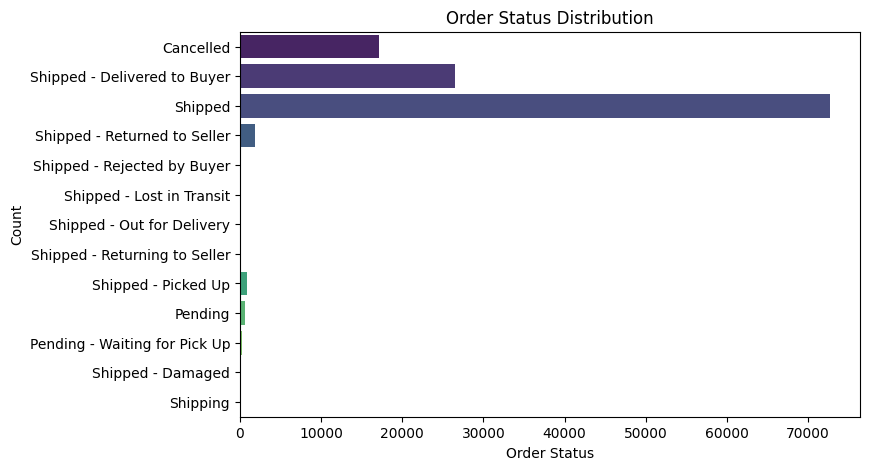

In [ ]:
# Plot order status distribution
plt.figure(figsize=(8, 5))
sns.countplot(df['Status'], palette='viridis')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

**Interpretation:**

- Most orders fall under "Shipped," indicating that a large volume of orders is processed for shipping.
- A substantial number of orders are successfully delivered, but cancellations are also significant.
- Minor statuses like "Out for Delivery" or "Damaged" occur less frequently, highlighting potential areas for process improvement.

In [ ]:
# sales performance

In [ ]:
# Fulfillment and Sales Channel Analysis
fulfillment_counts = df['Fulfilment'].value_counts()
channel_counts = df['Sales Channel'].value_counts()
print("Fulfillment Method Counts:\n", fulfillment_counts)
print("Sales Channel Counts:\n", channel_counts)

Fulfillment Method Counts:
 Fulfilment
Amazon      83890
Merchant    36311
Name: count, dtype: int64
Sales Channel Counts:
 Sales Channel
Amazon.in     120077
Non-Amazon       124
Name: count, dtype: int64


<ipython-input-306-f3f0db4119bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Fulfilment'], palette='Blues')
<ipython-input-306-f3f0db4119bb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Sales Channel'], palette='Greens')


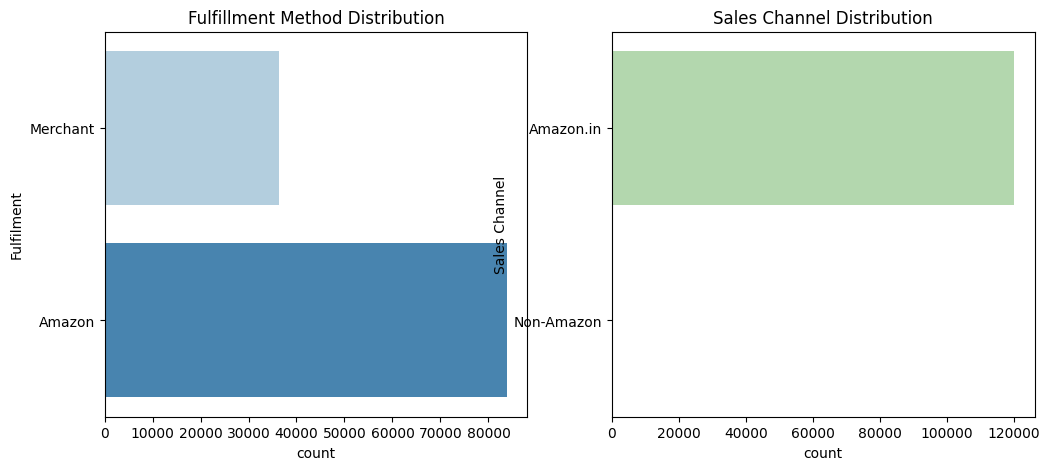

In [ ]:
# Plot fulfillment method and sales channel
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(df['Fulfilment'], palette='Blues')
plt.title('Fulfillment Method Distribution')

plt.subplot(1, 2, 2)
sns.countplot(df['Sales Channel'], palette='Greens')
plt.title('Sales Channel Distribution')
plt.show()

In [ ]:
# category and size insight

In [ ]:
# Sales by Category
category_sales = df.groupby('Category')['Qty'].sum()
print("Sales by Category:\n", category_sales)

Sales by Category:
 Category
Blazzer     13214
Perfume       964
Shirt       41354
Shoes         128
Socks         368
T-shirt     42444
Trousers     9332
Wallet        831
Watch           2
Name: Qty, dtype: int64


<ipython-input-309-bb5e74872aba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='magma')


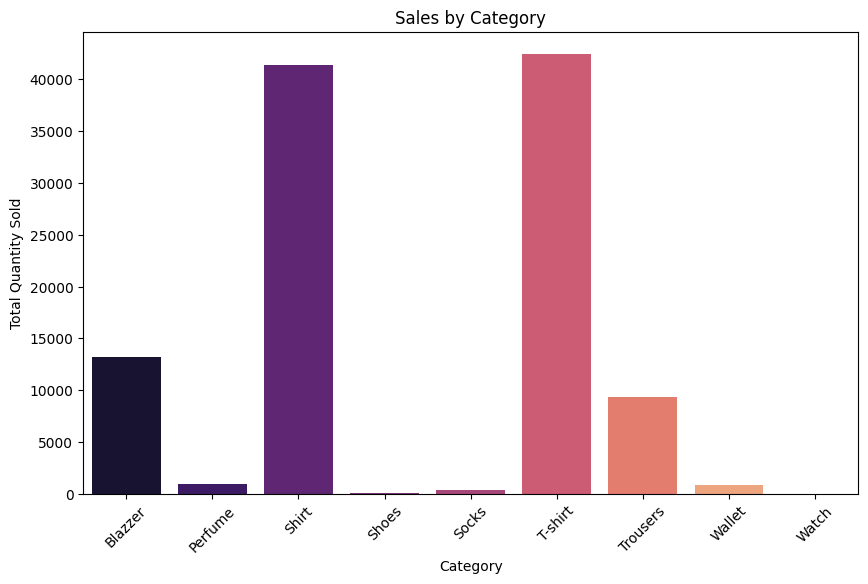

In [ ]:
# Plot sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='magma')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

**Interpretation:**
- Amazon is both the leading fulfillment provider and sales channel, indicating a strong reliance on its logistics and marketplace.
- Shoes and Toys are the most popular product categories, suggesting a potential focus area for marketing or inventory management.
- Categories like Socks, Towles, and Blanket have minimal sales, which might require different strategies for improvement or reconsideration in product offerings.

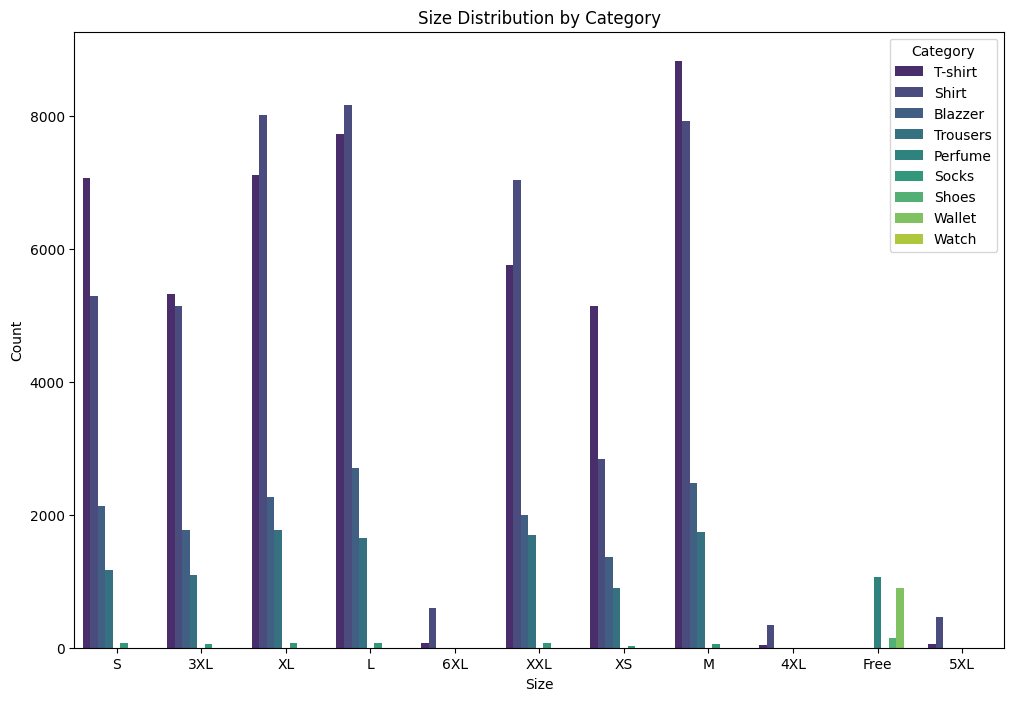

In [ ]:
# Size distribution within categories
plt.figure(figsize=(12, 8))
sns.countplot(x='Size', hue='Category', data=df, palette='viridis')
plt.title('Size Distribution by Category')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

- For most categories (e.g., T-shirt, Blazers), standard sizes like M, L, and XL are the most common.
- Certain categories (like Perfumes and Watches) don’t have a size dimension or are recorded as "Free" or have a single uniform size.
- Shoes are available in sizes like XS, S, M, and L, with higher counts for common shoe sizes.

In [ ]:
# Ship Service Level Analysis
service_level_counts = df['ship-service-level'].value_counts()
print("Shipping Service Level Counts:\n", service_level_counts)

Shipping Service Level Counts:
 ship-service-level
Expedited    82811
Standard     37390
Name: count, dtype: int64


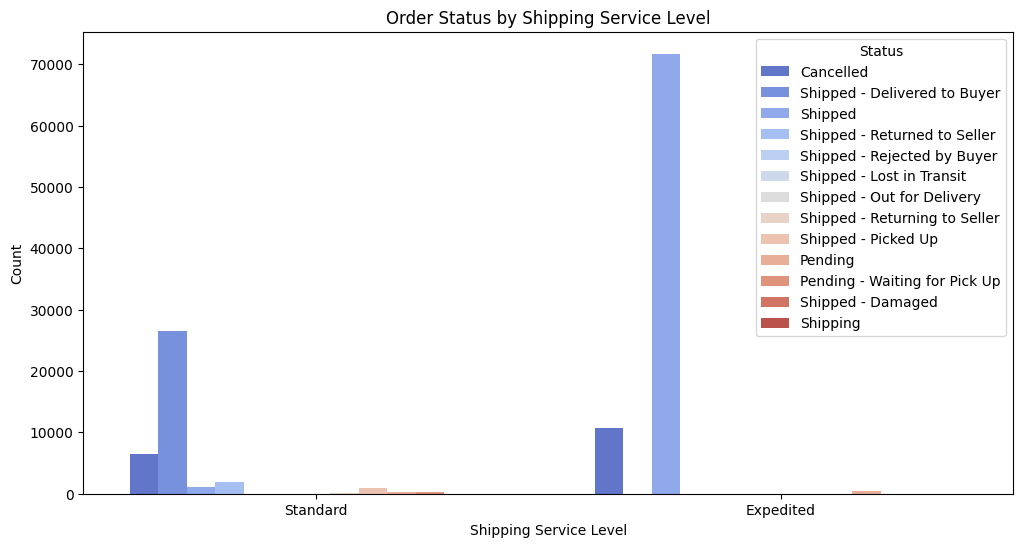

In [ ]:
# Plot ship service level and order status
plt.figure(figsize=(12, 6))
sns.countplot(x='ship-service-level', hue='Status', data=df, palette='coolwarm')
plt.title('Order Status by Shipping Service Level')
plt.xlabel('Shipping Service Level')
plt.ylabel('Count')
plt.show()

- For Standard shipping, most orders are in the “Shipped” status, with some in "Cancelled" or "Pending."
- For Expedited shipping, there are fewer orders overall, but "Shipped" remains the predominant status.

In [ ]:
# Top cities by sales
city_sales = df['ship-city'].value_counts().head(10)
print("Top Cities by Number of Orders:\n", city_sales)

Top Cities by Number of Orders:
 ship-city
BENGALURU    10441
HYDERABAD     7404
MUMBAI        5645
NEW DELHI     5425
CHENNAI       4925
PUNE          3593
KOLKATA       2246
GURUGRAM      1768
THANE         1612
LUCKNOW       1393
Name: count, dtype: int64


<ipython-input-314-629561204205>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette='Set3')


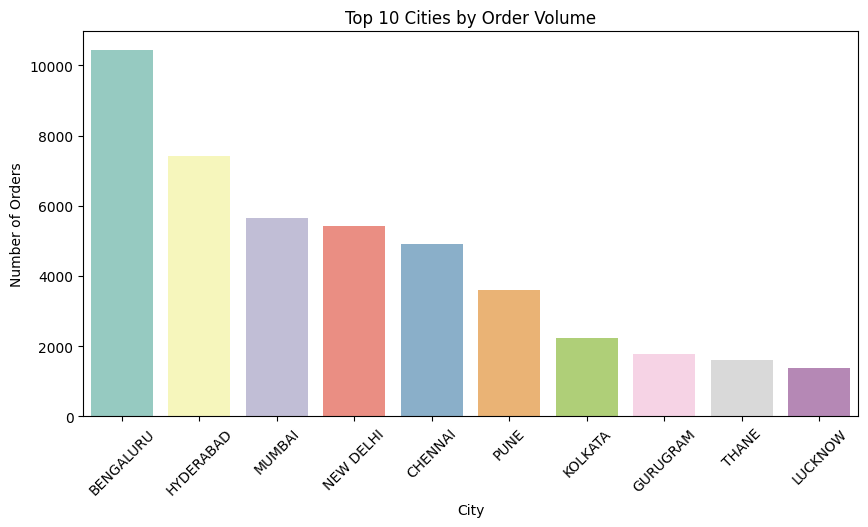

In [ ]:

# Plot sales by top cities
plt.figure(figsize=(10, 5))
sns.barplot(x=city_sales.index, y=city_sales.values, palette='Set3')
plt.title('Top 10 Cities by Order Volume')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

- Key Observations:

BANGALORE, HYDERABAD, and MUMBAI are major contributors to the order volume.
There is a steep drop in order volume after the top few cities, indicating that demand is concentrated in these leading cities.


- Business Implications:

This analysis highlights the need to focus marketing and inventory efforts in high-demand cities like Bangalore, Hyderabad, and Mumbai.
The company could explore growth opportunities in cities with lower volumes to expand market share.

In [ ]:
# State-level analysis
state_sales = df['ship-state'].value_counts().head(10)
print("Top States by Number of Orders:\n", state_sales)

Top States by Number of Orders:
 ship-state
MAHARASHTRA       20756
KARNATAKA         16162
TAMIL NADU        10507
TELANGANA         10394
UTTAR PRADESH     10057
DELHI              6347
KERALA             6097
WEST BENGAL        5645
ANDHRA PRADESH     4970
Gujarat            4161
Name: count, dtype: int64


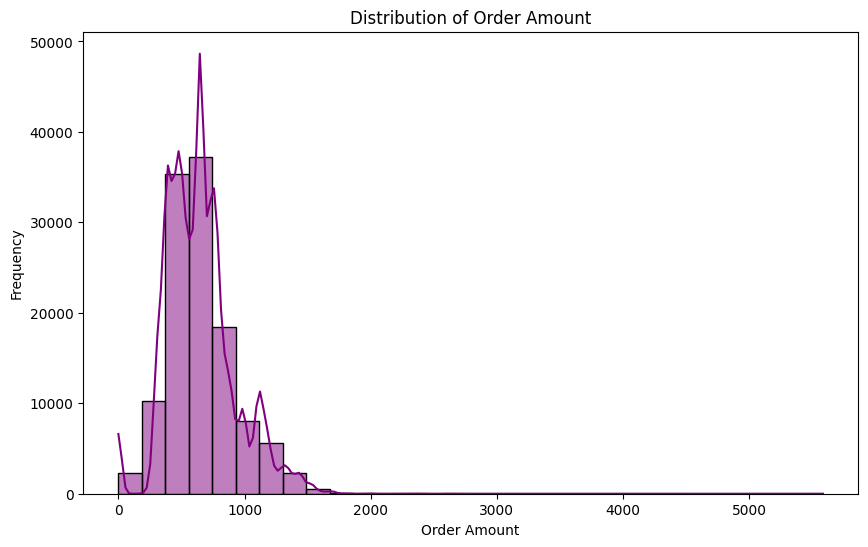

In [ ]:
# Distribution of Amount (Order Value)
plt.figure(figsize=(10, 6))
# sns.histplot(df['Amount'].dropna(), kde=True, bins=30, color='purple')
sns.histplot(data=df['Amount'].dropna(), kde=True,bins=30, color='purple')
plt.title('Distribution of Order Amount')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')
plt.show()

- Key Observations:

The order amount distribution is right-skewed, with a large number of low-value orders.
There is a steep decline in frequency as the order value goes beyond 1000, indicating that high-value orders are less common.

- Business Implications:

The company’s revenue is primarily driven by a high volume of low-value orders. Strategies could focus on increasing the frequency of these small orders or encouraging higher-value purchases.
For high-value orders, the company could consider special promotions or incentives to attract customers interested in premium or bulk purchases.

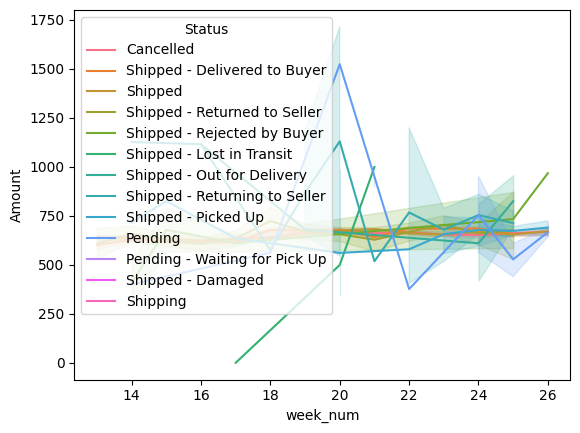

In [ ]:
sns.lineplot(data=df, x="week_num",
             y="Amount", hue="Status")
plt.show()

In [ ]:
# Average order amount by category
avg_amount_category = df.groupby('Category')['Amount'].mean()
print("Average Order Amount by Category:\n", avg_amount_category)


Average Order Amount by Category:
 Category
Blazzer     756.258732
Perfume     715.550093
Shirt       468.580211
Shoes       786.095069
Socks       370.838662
T-shirt     820.793620
Trousers    530.566688
Wallet      527.088442
Watch       305.000000
Name: Amount, dtype: float64


<ipython-input-318-5c194b62daa9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_amount_category.index, y=avg_amount_category.values, palette='rocket')


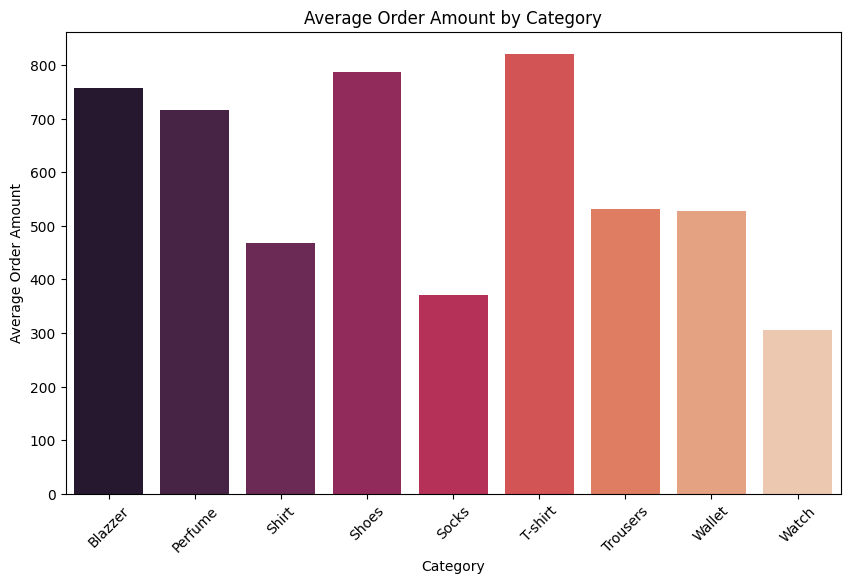

In [ ]:
# Plot average order amount by category
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_amount_category.index, y=avg_amount_category.values, palette='rocket')
plt.title('Average Order Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Order Amount')
plt.xticks(rotation=45)
plt.show()

- Key Observations:

The high average order amounts for categories like T-shirts, Shoes, Blazers, and Perfumes may indicate that these items are more valuable or have higher price points.
Categories like Socks, Trousers, Wallets, and Watches show lower average order values, suggesting these items may be less expensive or often purchased in smaller quantities.

- Business Implications:

The business could focus on promoting high-average-value items (T-shirts, Shoes, Blazers, and Perfumes) to boost revenue.
For low-average-value items (such as Socks and Watches), bundling strategies or volume discounts might encourage higher order quantities, potentially increasing average order values in those categories.

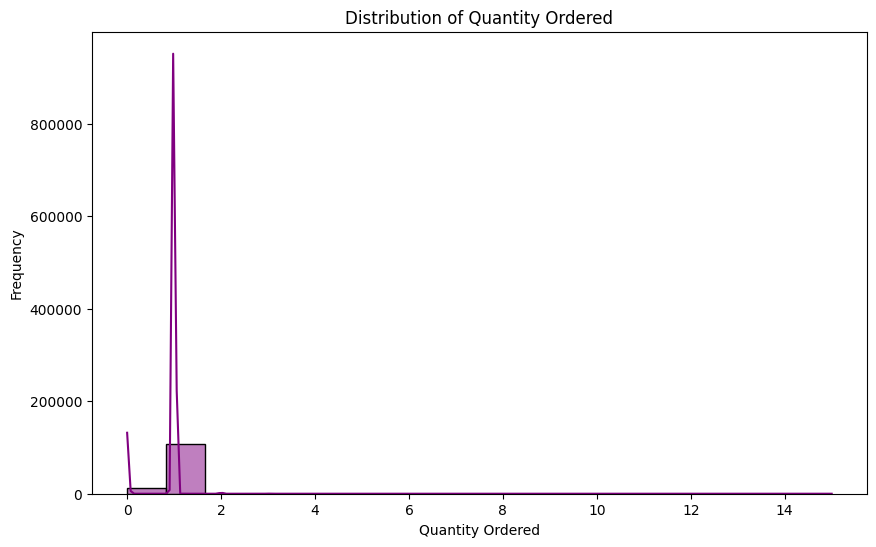

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Qty'], kde=True, color='purple')
plt.title("Distribution of Quantity Ordered")
plt.xlabel("Quantity Ordered")
plt.ylabel("Frequency")
plt.show()


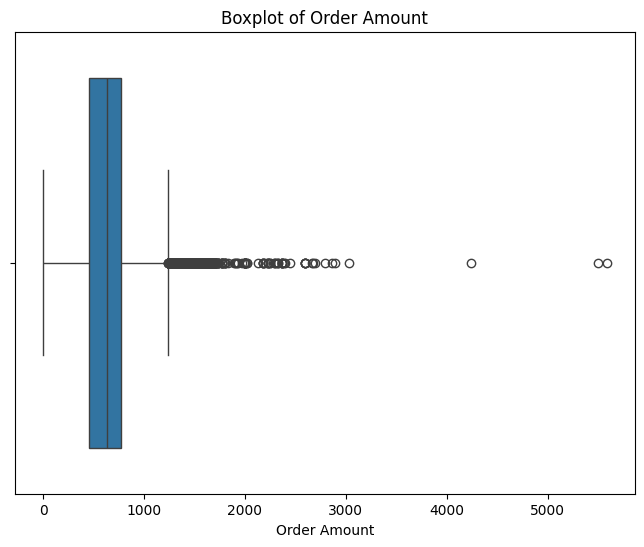

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Order Amount")
plt.xlabel("Order Amount")
plt.show()


<ipython-input-322-2d059ae3639f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['ship-service-level'], palette='coolwarm')


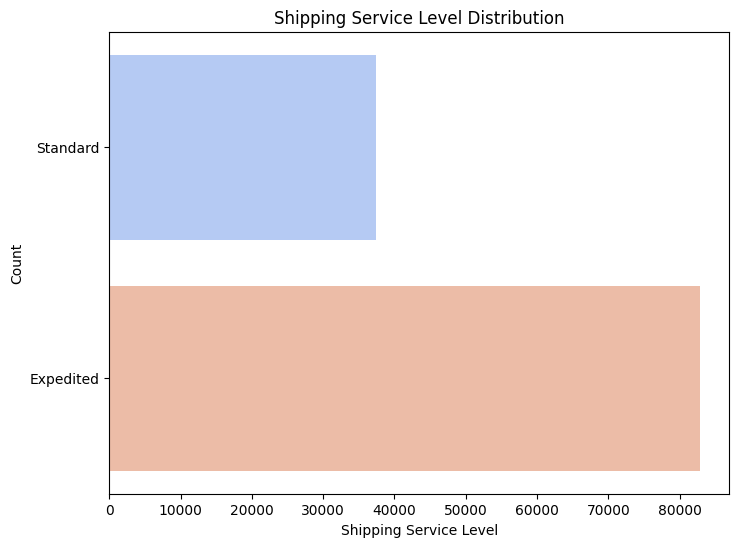

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(df['ship-service-level'], palette='coolwarm')
plt.title("Shipping Service Level Distribution")
plt.xlabel("Shipping Service Level")
plt.ylabel("Count")
plt.show()

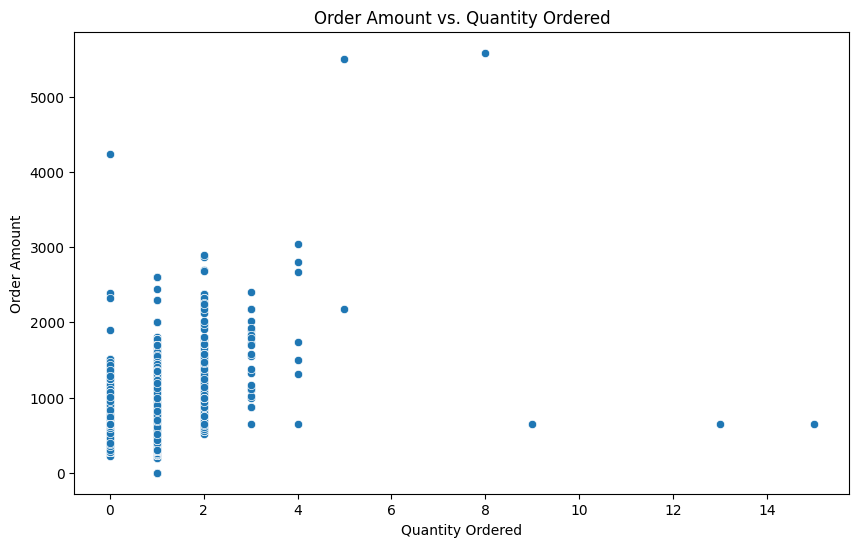

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Qty'], y=df['Amount'])
plt.title("Order Amount vs. Quantity Ordered")
plt.xlabel("Quantity Ordered")
plt.ylabel("Order Amount")
plt.show()


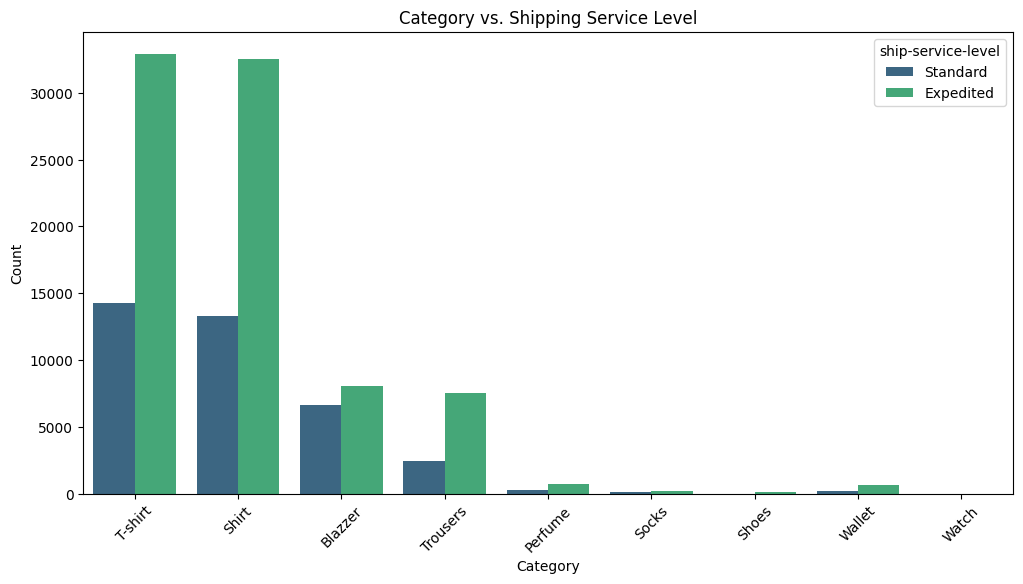

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', hue='ship-service-level', palette='viridis')
plt.title("Category vs. Shipping Service Level")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-325-e33d41a08f58>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_order_amount.index, y=city_order_amount.values, palette='cool')


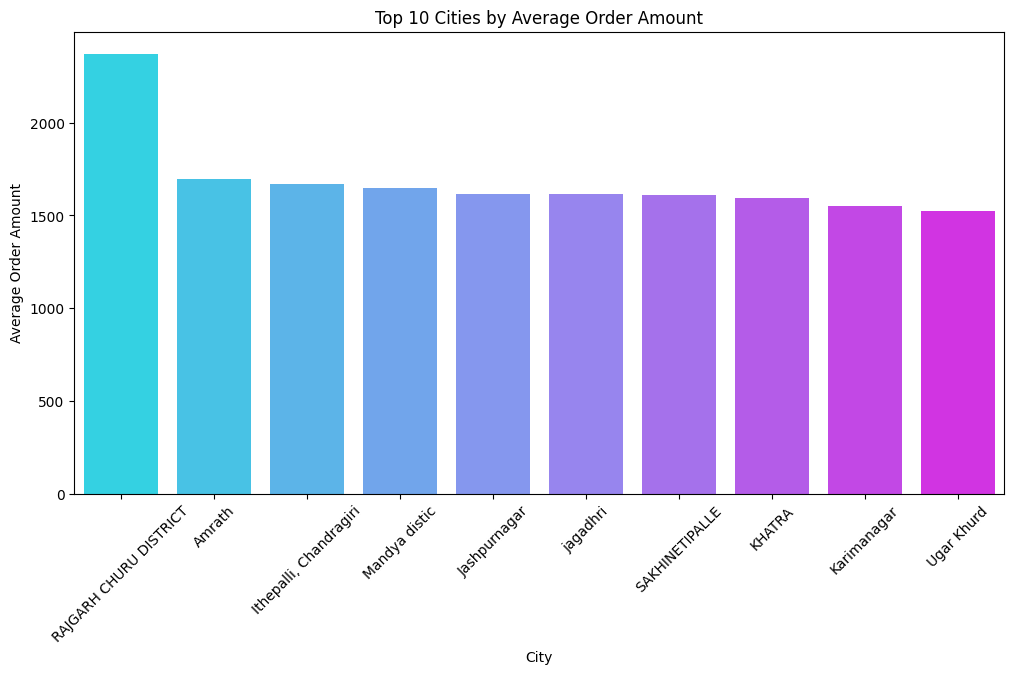

In [ ]:
city_order_amount = df.groupby('ship-city')['Amount'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=city_order_amount.index, y=city_order_amount.values, palette='cool')
plt.title("Top 10 Cities by Average Order Amount")
plt.xlabel("City")
plt.ylabel("Average Order Amount")
plt.xticks(rotation=45)
plt.show()

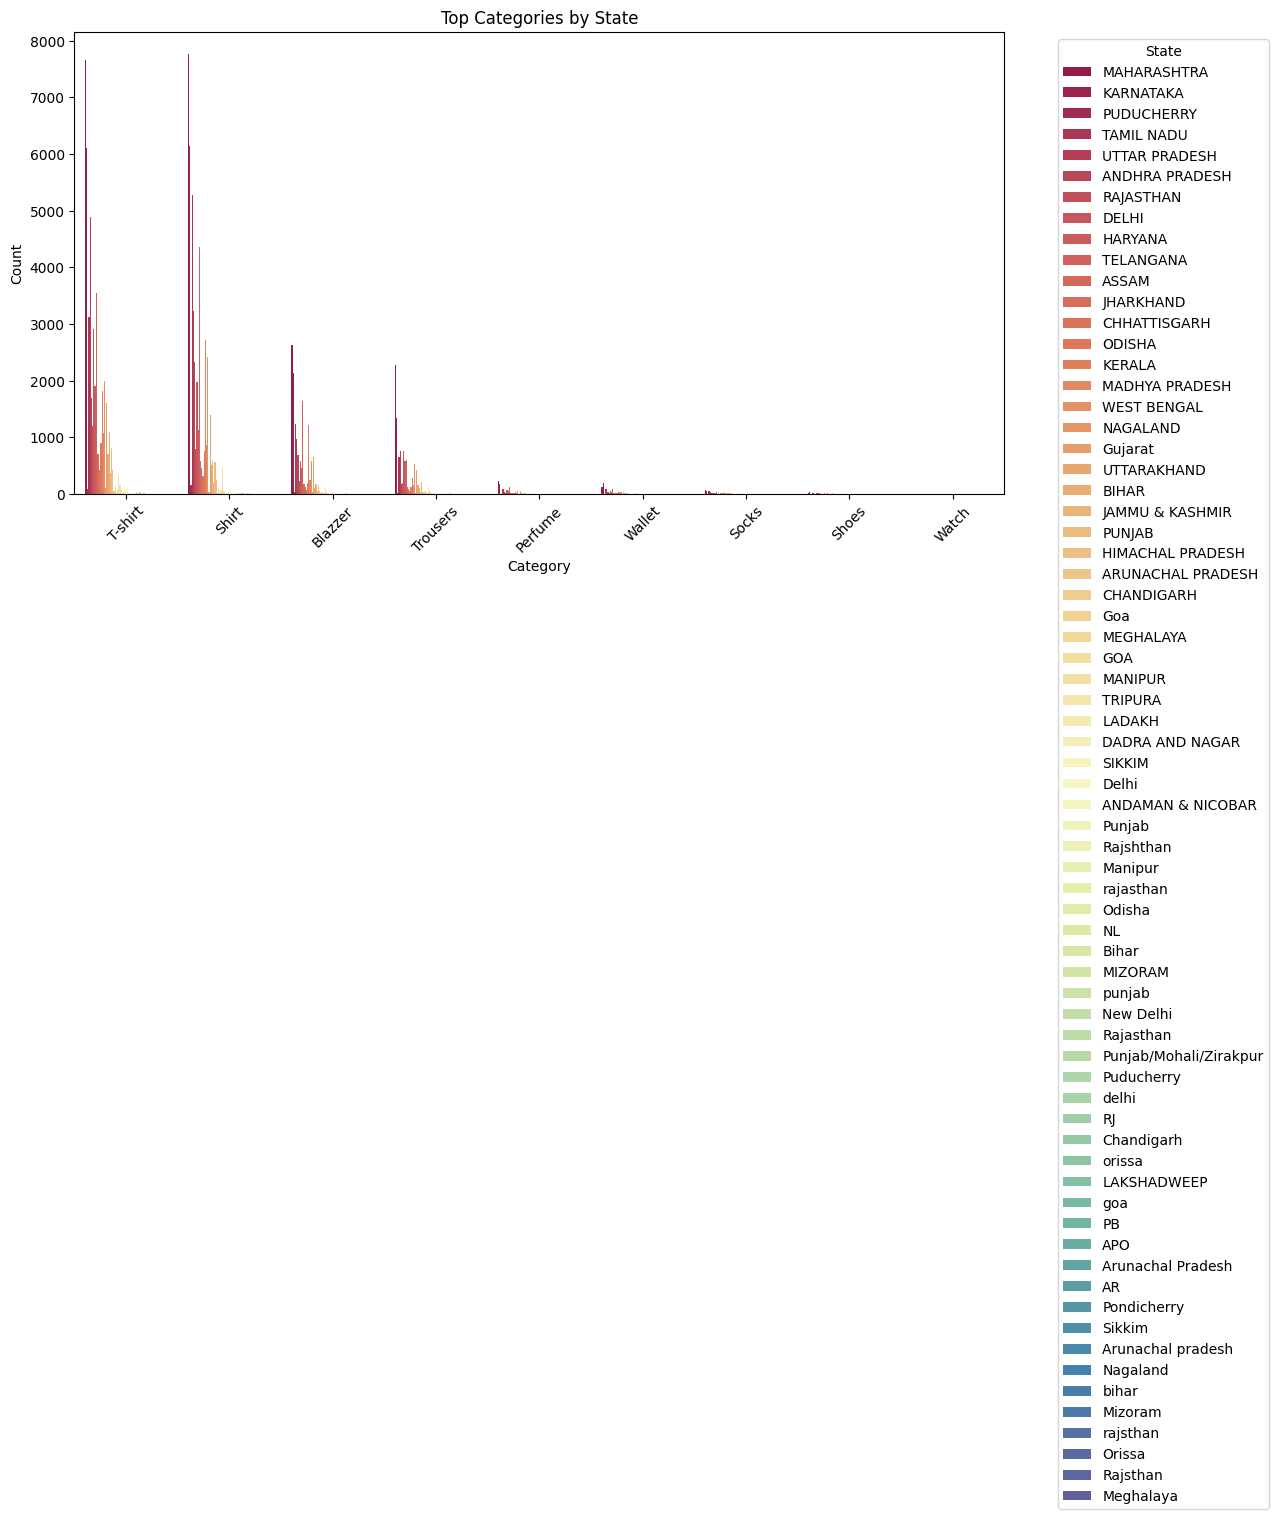

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', hue='ship-state', palette='Spectral', order=df['Category'].value_counts().index)
plt.title("Top Categories by State")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [ ]:
repeat_orders = data['Order ID'].value_counts().loc[lambda x: x > 1].size
print(f"Number of repeat orders: {repeat_orders}")


Number of repeat orders: 6988


<ipython-input-328-a19e7b29b489>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_qty_by_category.index, y=avg_qty_by_category.values, palette='cividis')


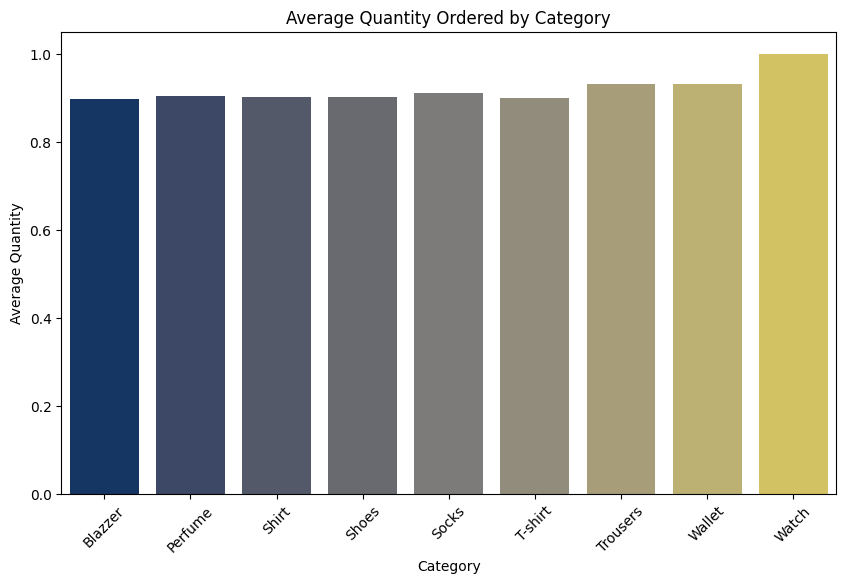

In [ ]:
avg_qty_by_category = df.groupby('Category')['Qty'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_qty_by_category.index, y=avg_qty_by_category.values, palette='cividis')
plt.title("Average Quantity Ordered by Category")
plt.xlabel("Category")
plt.ylabel("Average Quantity")
plt.xticks(rotation=45)
plt.show()
